In [245]:
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import pandas as pd 
import random
import math
import time
from sklearn.linear_model import LinearRegression, BayesianRidge
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import datetime
import operator 
plt.style.use('fivethirtyeight')
%matplotlib inline

In [246]:
confirmed_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
deaths_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recoveries_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

In [247]:
cols= confirmed_df.keys()
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


F:\SETUP\ANACONDA\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['random', 'poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


<Figure size 1800x864 with 0 Axes>

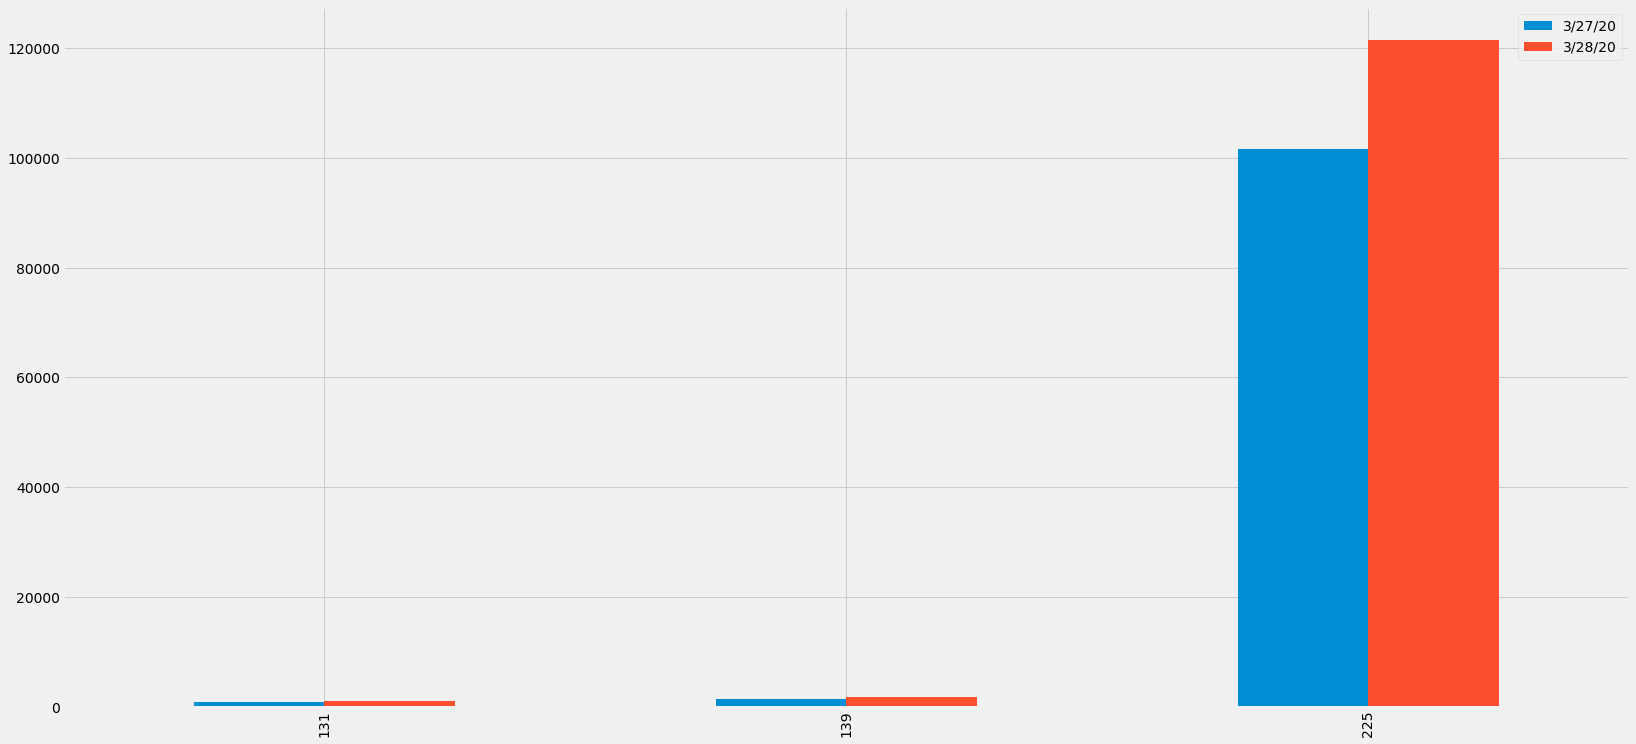

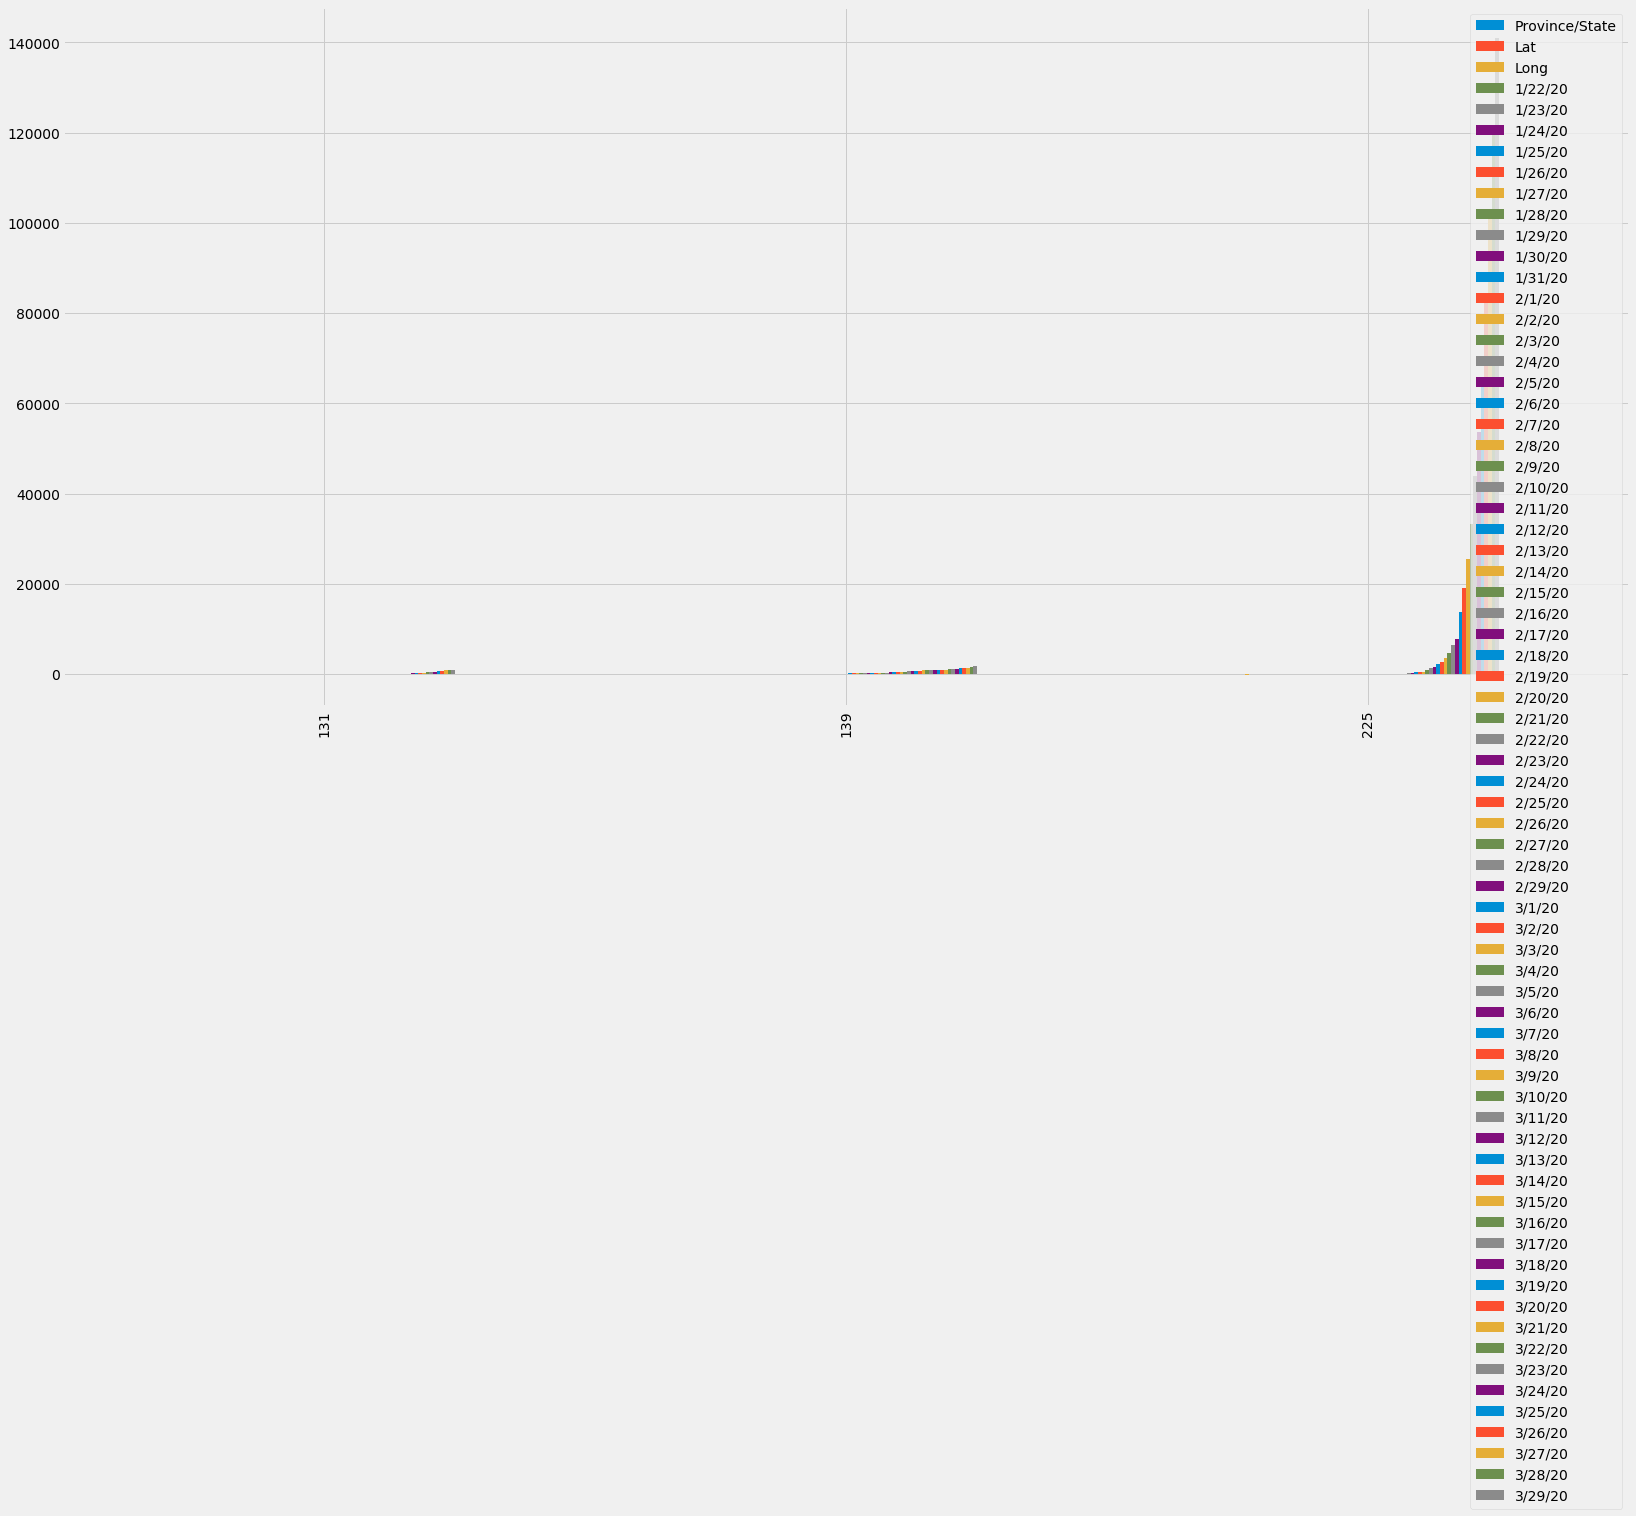

In [248]:
#comparing India, Japan , US on last 2 days and all days
cmp_be=confirmed_df.loc[:,['Country/Region','3/27/20','3/28/20']]
%pylab
figsize(25, 12)
plt.figure(figsize(25,12))
#ax = cmp_be.plot.bar(x='Country/Region', y=['1/22/20','3/28/20'], rot=0)
cmp_be.loc[(cmp_be['Country/Region']== 'India') | (cmp_be['Country/Region'] == 'Japan') | (cmp_be['Country/Region'] == 'US') ].plot.bar()
confirmed_df.loc[(confirmed_df['Country/Region']== 'India') | (confirmed_df['Country/Region'] == 'Japan') | (confirmed_df['Country/Region'] == 'US') ].plot.bar()


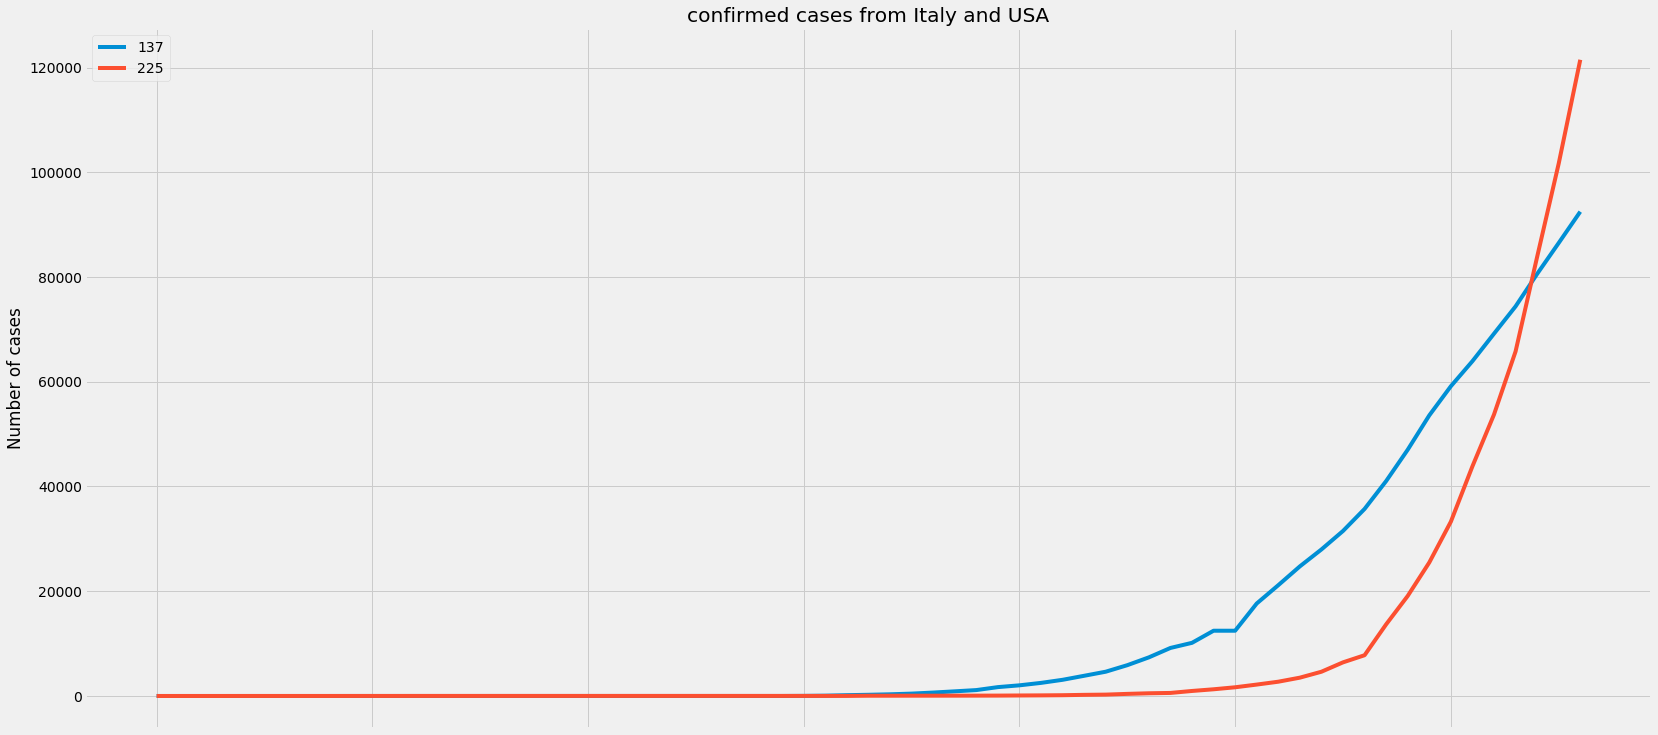

<Figure size 1800x864 with 0 Axes>

In [249]:
cmp_be1 = confirmed_df.loc[(confirmed_df['Country/Region']=='Italy')|(confirmed_df['Country/Region']=='US'),'1/22/20':'3/28/20']
#cmp_be1.head()
df = cmp_be1.transpose()
df.head()
#df.index = df.index.map(int)
df.plot(kind='line')
plt.title('confirmed cases from Italy and USA')
plt.ylabel('Number of cases')
#plt.xlabel('dates')
plt.figure(figsize(25,12))
plt.show()


In [250]:
confirmed = confirmed_df.loc[:, cols[4]:cols[-1]]
deaths = deaths_df.loc[:, cols[4]:cols[-1]]
recoveries = recoveries_df.loc[:, cols[4]:cols[-1]]
confirmed.head()

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20,3/25/20,3/26/20,3/27/20,3/28/20,3/29/20
0,0,0,0,0,0,0,0,0,0,0,...,24,24,40,40,74,84,94,110,110,120
1,0,0,0,0,0,0,0,0,0,0,...,70,76,89,104,123,146,174,186,197,212
2,0,0,0,0,0,0,0,0,0,0,...,90,139,201,230,264,302,367,409,454,511
3,0,0,0,0,0,0,0,0,0,0,...,75,88,113,133,164,188,224,267,308,334
4,0,0,0,0,0,0,0,0,0,0,...,1,2,2,3,3,3,4,4,5,7


In [251]:

dates = confirmed.keys()
world_cases = []
total_deaths = [] 
mortality_rate = []
recovery_rate = [] 
total_recovered = [] 
total_active = [] 
china_cases = [] 
italy_cases = []
us_cases = [] 
spain_cases = [] 
japan_cases = [] 
india_cases = [] 
korea_cases=[]


for i in dates:
    confirmed_sum = confirmed[i].sum()
    death_sum = deaths[i].sum()
    recovered_sum = recoveries[i].sum()
    print (confirmed_sum)
        # confirmed, deaths, recovered, and active
    world_cases.append(confirmed_sum)
    total_deaths.append(death_sum)
    total_recovered.append(recovered_sum)
    total_active.append(confirmed_sum-death_sum-recovered_sum)
    
    # calculate rates
    mortality_rate.append(death_sum/confirmed_sum)
    recovery_rate.append(recovered_sum/confirmed_sum)

    # case studies 
    china_cases.append(confirmed_df[confirmed_df['Country/Region']=='China'][i].sum())
    italy_cases.append(confirmed_df[confirmed_df['Country/Region']=='Italy'][i].sum())
    us_cases.append(confirmed_df[confirmed_df['Country/Region']=='US'][i].sum())
    spain_cases.append(confirmed_df[confirmed_df['Country/Region']=='Spain'][i].sum())
    japan_cases.append(confirmed_df[confirmed_df['Country/Region']=='Japan'][i].sum())
    india_cases.append(confirmed_df[confirmed_df['Country/Region']=='India'][i].sum())
    korea_cases.append(confirmed_df[confirmed_df['Country/Region']=='Korea, South'][i].sum())
    

555
654
941
1434
2118
2927
5578
6166
8234
9927
12038
16787
19881
23892
27635
30794
34391
37120
40150
42762
44802
45221
60368
66885
69030
71224
73258
75136
75639
76197
76819
78572
78958
79561
80406
81388
82746
84112
86011
88369
90306
92840
95120
97886
101801
105847
109821
113590
118620
125875
128352
145205
156101
167454
181574
197102
214821
242500
272035
304396
336953
378235
418045
467653
529591
593291
660706
720117


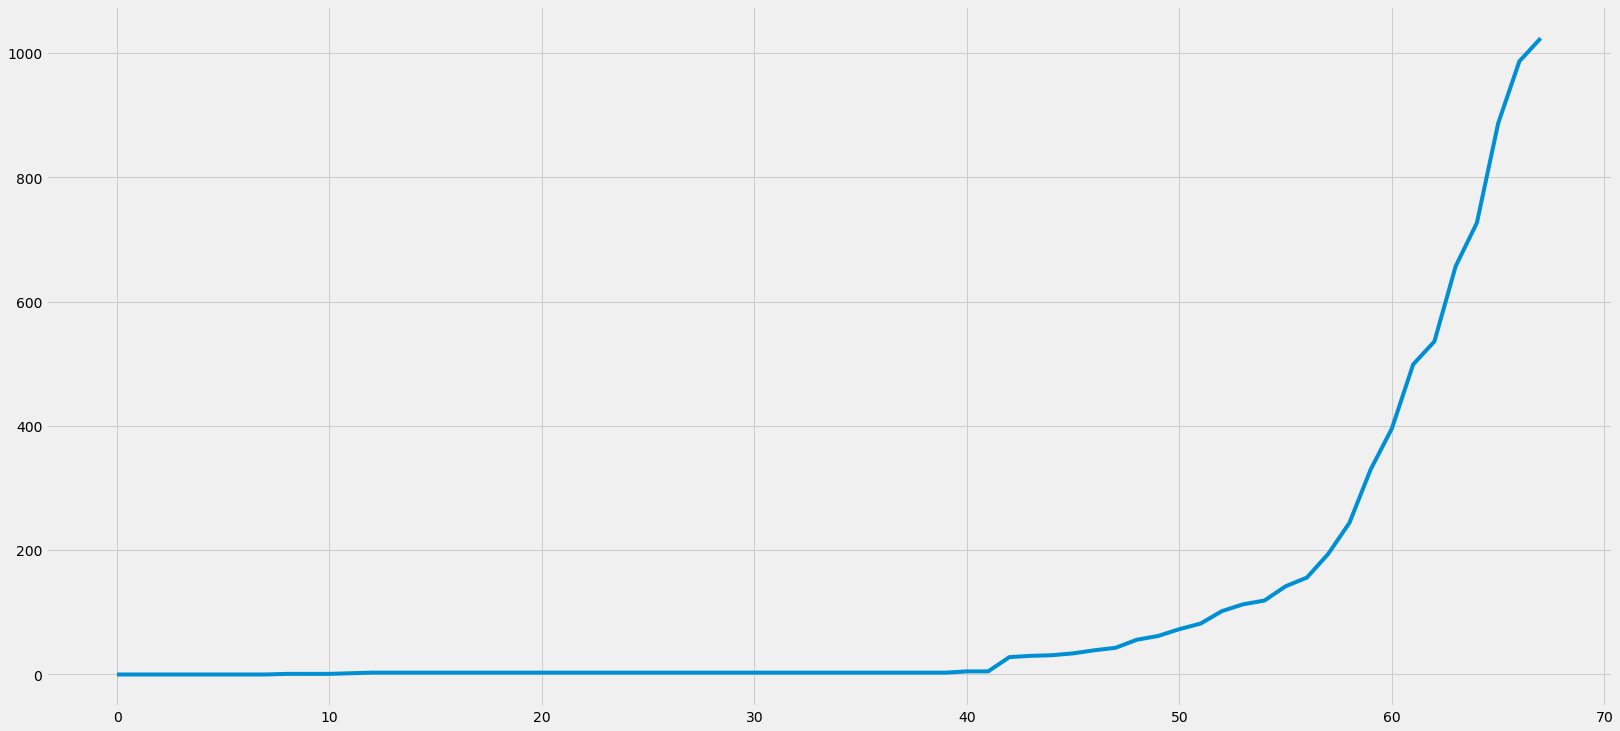

In [252]:
plot(india_cases)

[555, 99, 287, 493, 684, 809, 2651, 588, 2068, 1693, 2111, 4749, 3094, 4011, 3743, 3159, 3597, 2729, 3030, 2612, 2040, 419, 15147, 6517, 2145, 2194, 2034, 1878, 503, 558, 622, 1753, 386, 603, 845, 982, 1358, 1366, 1899, 2358, 1937, 2534, 2280, 2766, 3915, 4046, 3974, 3769, 5030, 7255, 2477, 16853, 10896, 11353, 14120, 15528, 17719, 27679, 29535, 32361, 32557, 41282, 39810, 49608, 61938, 63700, 67415, 59411]


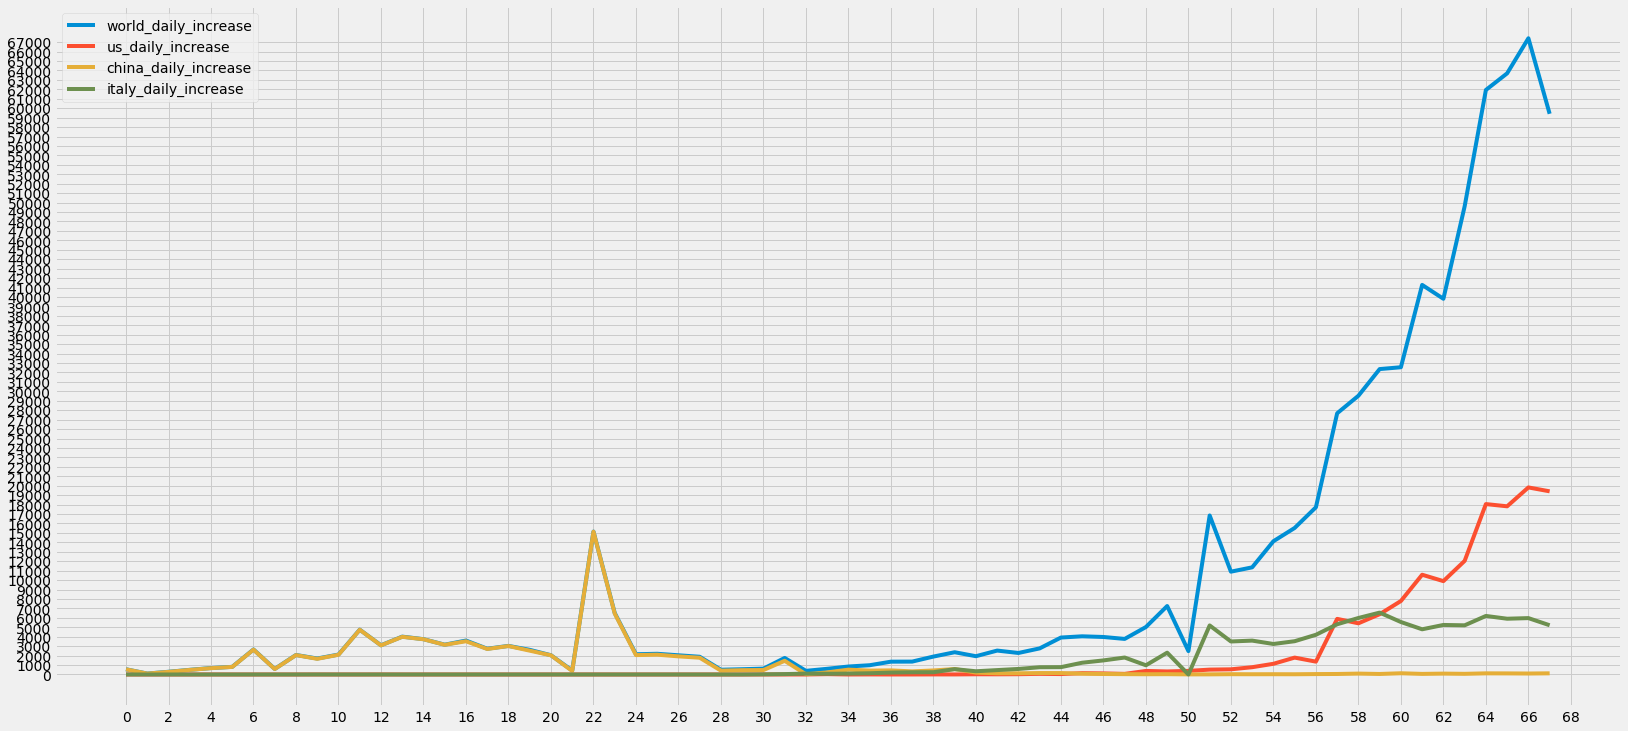

In [253]:
def daily_increase(data):
    d = [] 
    for i in range(len(data)):
        if i == 0:
            d.append(data[0])
        else:
            d.append(data[i]-data[i-1])
    return d 

world_daily_increase = daily_increase(world_cases)
china_daily_increase = daily_increase(china_cases)
italy_daily_increase = daily_increase(italy_cases)
us_daily_increase = daily_increase(us_cases)
spain_daily_increase = daily_increase(spain_cases)
japan_daily_increase = daily_increase(japan_cases)
india_daily_increase = daily_increase(india_cases)
korea_daily_increase = daily_increase(korea_cases)

print (world_daily_increase)
plt.plot(world_daily_increase)
plt.plot(us_daily_increase)
plt.plot(china_daily_increase)
plt.plot(italy_daily_increase)
plt.legend(['world_daily_increase', 'us_daily_increase','china_daily_increase','italy_daily_increase'])
plt.yticks(np.arange(0, max(world_daily_increase)+1, 1000))
plt.xticks(np.arange(0, len(world_cases)+1, 2))
plt.show()

In [254]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1, 1)
world_cases = np.array(world_cases).reshape(-1, 1)
total_deaths = np.array(total_deaths).reshape(-1, 1)
total_recovered = np.array(total_recovered).reshape(-1, 1)
world_cases.ndim

2

([<matplotlib.axis.YTick at 0x1ffa429db38>,
 <a list of 29 Text yticklabel objects>)

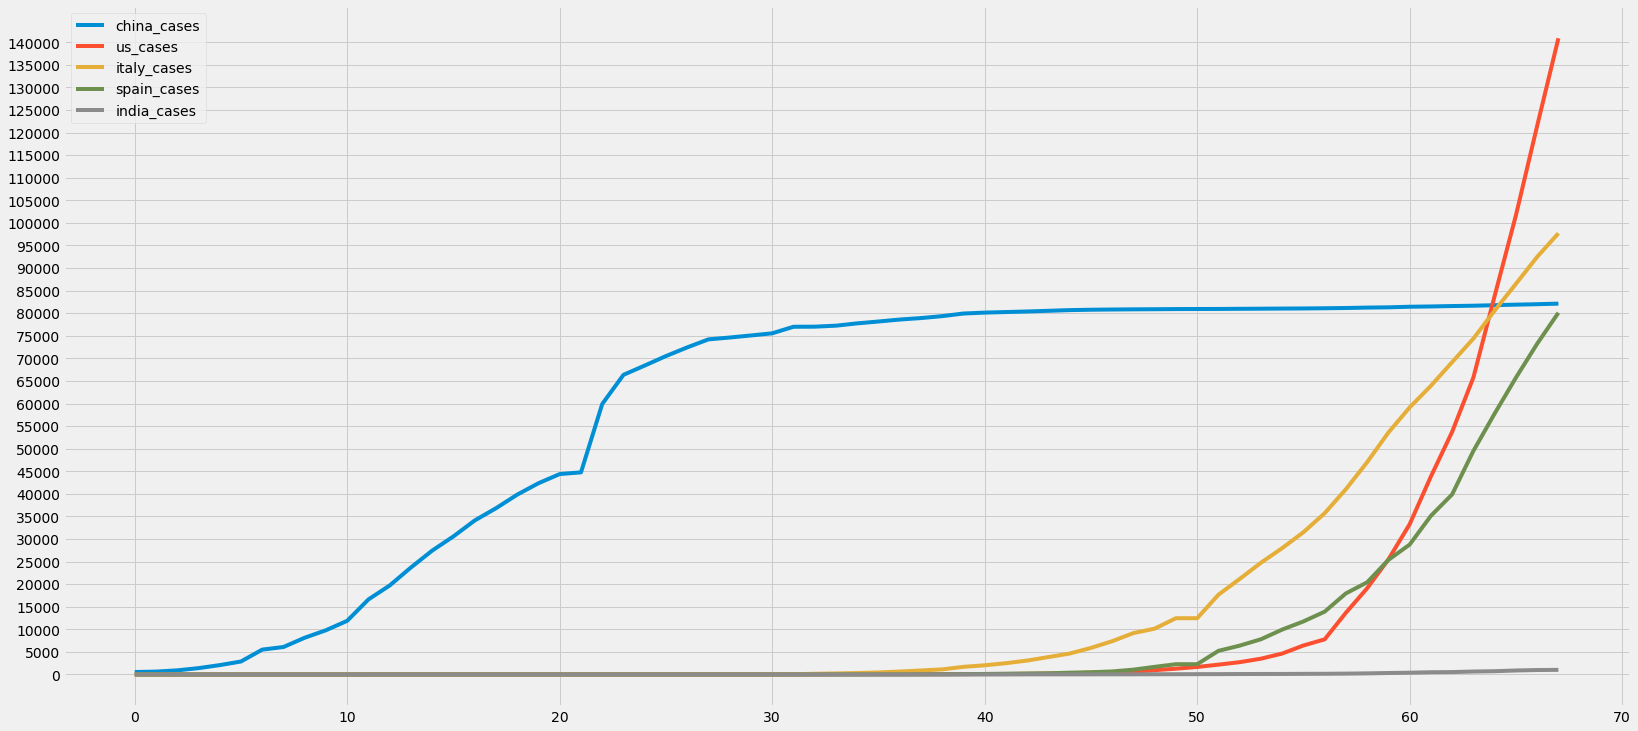

In [255]:
plt.plot(china_cases)
plt.plot(us_cases)
plt.plot(italy_cases)
plt.plot(spain_cases)
plt.plot(india_cases)
plt.legend(['china_cases', 'us_cases','italy_cases','spain_cases','india_cases'])
plt.yticks(np.arange(0, max(us_cases)+1, 5000))

In [256]:
days_in_future = 10
future_forcast = np.array([i for i in range(len(dates)+days_in_future)]).reshape(-1, 1)
print(future_forcast)
adjusted_dates = future_forcast[:-10]
print(adjusted_dates)

[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]
 [68]
 [69]
 [70]
 [71]
 [72]
 [73]
 [74]
 [75]
 [76]
 [77]]
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]
 [64]
 [65]
 [66]
 [67]]


In [257]:
start = '1/22/2020'
start_date = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forcast_dates = []
for i in range(len(future_forcast)):
    future_forcast_dates.append((start_date + datetime.timedelta(days=i)).strftime('%m/%d/%Y'))
print(future_forcast_dates)    

['01/22/2020', '01/23/2020', '01/24/2020', '01/25/2020', '01/26/2020', '01/27/2020', '01/28/2020', '01/29/2020', '01/30/2020', '01/31/2020', '02/01/2020', '02/02/2020', '02/03/2020', '02/04/2020', '02/05/2020', '02/06/2020', '02/07/2020', '02/08/2020', '02/09/2020', '02/10/2020', '02/11/2020', '02/12/2020', '02/13/2020', '02/14/2020', '02/15/2020', '02/16/2020', '02/17/2020', '02/18/2020', '02/19/2020', '02/20/2020', '02/21/2020', '02/22/2020', '02/23/2020', '02/24/2020', '02/25/2020', '02/26/2020', '02/27/2020', '02/28/2020', '02/29/2020', '03/01/2020', '03/02/2020', '03/03/2020', '03/04/2020', '03/05/2020', '03/06/2020', '03/07/2020', '03/08/2020', '03/09/2020', '03/10/2020', '03/11/2020', '03/12/2020', '03/13/2020', '03/14/2020', '03/15/2020', '03/16/2020', '03/17/2020', '03/18/2020', '03/19/2020', '03/20/2020', '03/21/2020', '03/22/2020', '03/23/2020', '03/24/2020', '03/25/2020', '03/26/2020', '03/27/2020', '03/28/2020', '03/29/2020', '03/30/2020', '03/31/2020', '04/01/2020', '04/0

In [258]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22, world_cases, test_size=0.05, shuffle=False)
print ("X_train: ", X_train_confirmed)
print ("y_train: ", y_train_confirmed)
print("X_test: ", X_test_confirmed)
print ("y_test: ", y_test_confirmed)

X_train:  [[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]
 [25]
 [26]
 [27]
 [28]
 [29]
 [30]
 [31]
 [32]
 [33]
 [34]
 [35]
 [36]
 [37]
 [38]
 [39]
 [40]
 [41]
 [42]
 [43]
 [44]
 [45]
 [46]
 [47]
 [48]
 [49]
 [50]
 [51]
 [52]
 [53]
 [54]
 [55]
 [56]
 [57]
 [58]
 [59]
 [60]
 [61]
 [62]
 [63]]
y_train:  [[   555]
 [   654]
 [   941]
 [  1434]
 [  2118]
 [  2927]
 [  5578]
 [  6166]
 [  8234]
 [  9927]
 [ 12038]
 [ 16787]
 [ 19881]
 [ 23892]
 [ 27635]
 [ 30794]
 [ 34391]
 [ 37120]
 [ 40150]
 [ 42762]
 [ 44802]
 [ 45221]
 [ 60368]
 [ 66885]
 [ 69030]
 [ 71224]
 [ 73258]
 [ 75136]
 [ 75639]
 [ 76197]
 [ 76819]
 [ 78572]
 [ 78958]
 [ 79561]
 [ 80406]
 [ 81388]
 [ 82746]
 [ 84112]
 [ 86011]
 [ 88369]
 [ 90306]
 [ 92840]
 [ 95120]
 [ 97886]
 [101801]
 [105847]
 [109821]
 [113590]
 [118620]
 [125875]
 [128352]
 [145205]
 [156101]
 [167454]
 [181574]
 [197102]
 [214821]
 [242500]
 [272035]
 [304

In [259]:
svm_confirmed = SVR(shrinking=True, kernel='poly',gamma=0.01, epsilon=1,degree=8, C=0.1)
svm_confirmed.fit(X_train_confirmed, y_train_confirmed)
svm_pred = svm_confirmed.predict(future_forcast)
#print(future_forcast,svm_pred)

F:\SETUP\ANACONDA\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MAE: 37461.46544901887
MSE: 1540824950.2667718


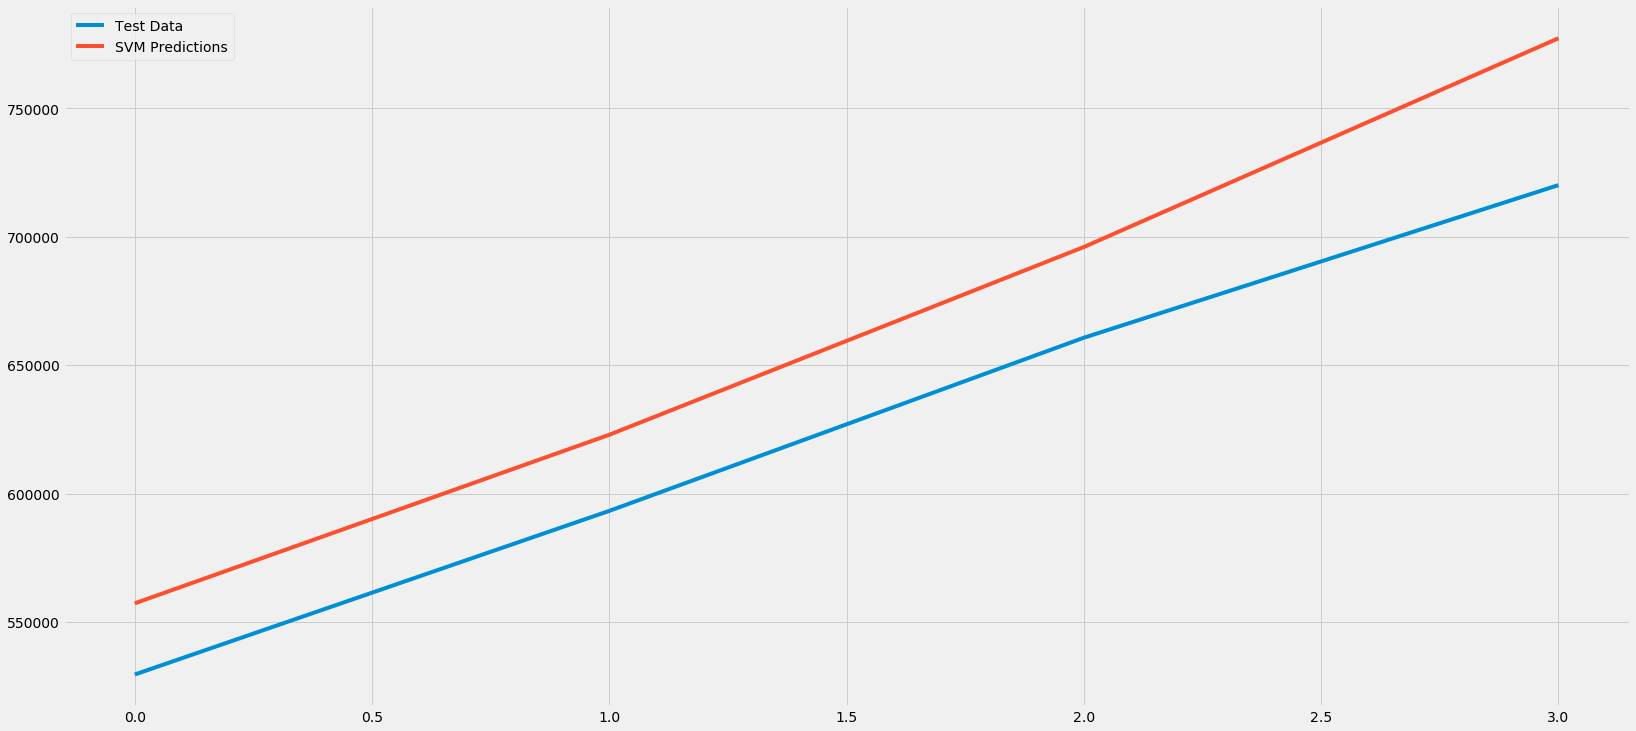

In [260]:
# check against testing data
svm_test_pred = svm_confirmed.predict(X_test_confirmed)
plt.plot(y_test_confirmed)
plt.plot(svm_test_pred)
plt.legend(['Test Data', 'SVM Predictions'])
print('MAE:', mean_absolute_error(svm_test_pred, y_test_confirmed))
print('MSE:',mean_squared_error(svm_test_pred, y_test_confirmed))

In [261]:
# transform our data for polynomial regression
poly = PolynomialFeatures(degree=6)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forcast = poly.fit_transform(future_forcast)
print(poly_X_train_confirmed)
print(poly_X_test_confirmed)
print(poly_future_forcast)


[[1.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
  0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00 1.00000000e+00 1.00000000e+00]
 [1.00000000e+00 2.00000000e+00 4.00000000e+00 8.00000000e+00
  1.60000000e+01 3.20000000e+01 6.40000000e+01]
 [1.00000000e+00 3.00000000e+00 9.00000000e+00 2.70000000e+01
  8.10000000e+01 2.43000000e+02 7.29000000e+02]
 [1.00000000e+00 4.00000000e+00 1.60000000e+01 6.40000000e+01
  2.56000000e+02 1.02400000e+03 4.09600000e+03]
 [1.00000000e+00 5.00000000e+00 2.50000000e+01 1.25000000e+02
  6.25000000e+02 3.12500000e+03 1.56250000e+04]
 [1.00000000e+00 6.00000000e+00 3.60000000e+01 2.16000000e+02
  1.29600000e+03 7.77600000e+03 4.66560000e+04]
 [1.00000000e+00 7.00000000e+00 4.90000000e+01 3.43000000e+02
  2.40100000e+03 1.68070000e+04 1.17649000e+05]
 [1.00000000e+00 8.00000000e+00 6.40000000e+01 5.12000000e+02
  4.09600000e+03 3.27680000e+04 2.62144000e+05]
 [1.000000

In [262]:

# polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forcast)
print('MAE:', mean_absolute_error(test_linear_pred, y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred, y_test_confirmed))

MAE: 8065.7319391802885
MSE: 68415669.27869879


In [263]:
print(linear_model.coef_)
print(test_linear_pred)


[[ 2.64417830e+03 -1.93944360e+03  4.25031513e+02 -1.40725478e+01
   2.31924686e-01 -3.37783266e-03  3.38775515e-05]]
[[522592.86345938]
 [583405.43371568]
 [650930.23538711]
 [725720.4603189 ]]


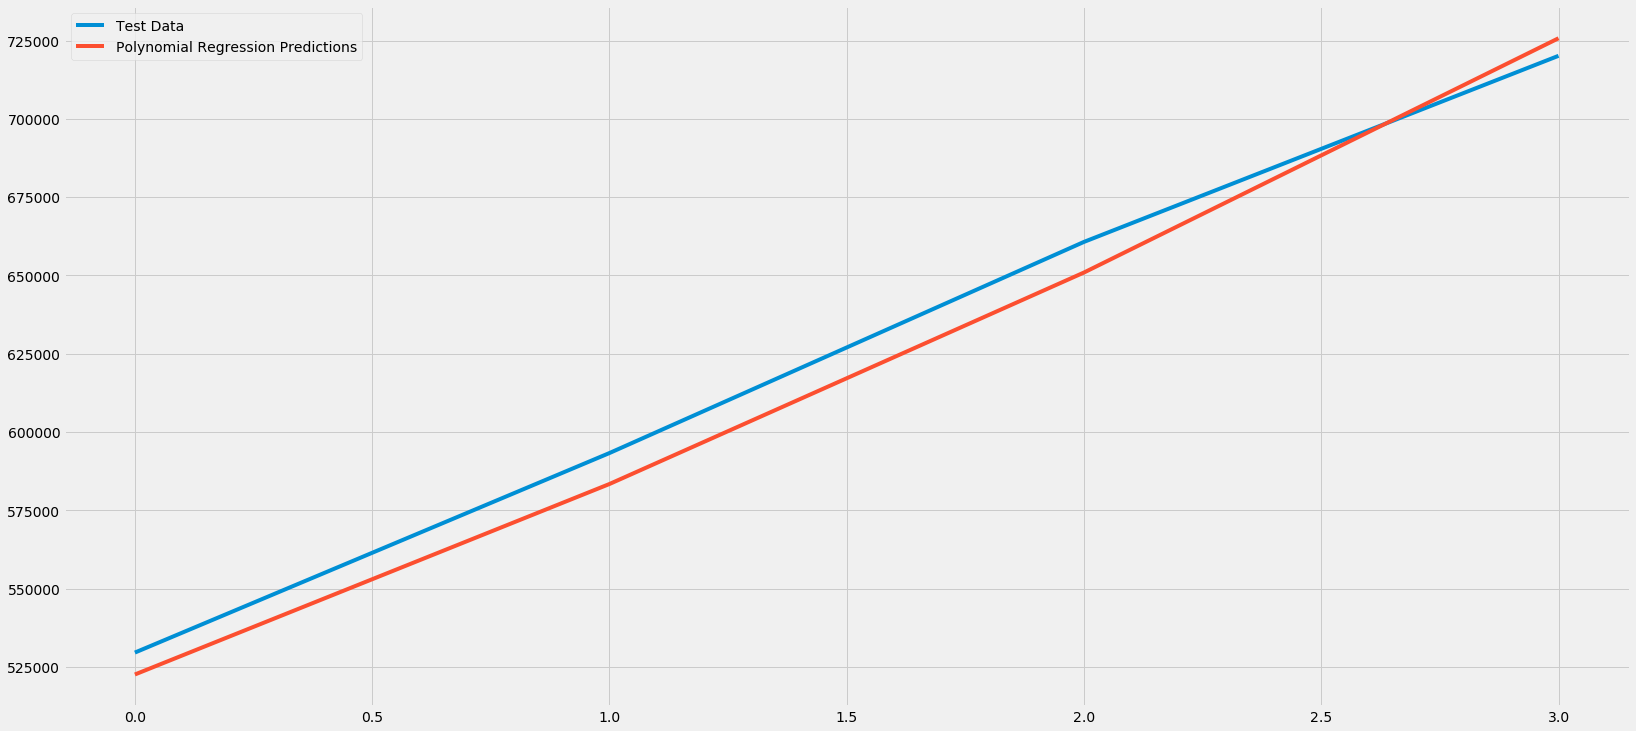

In [264]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data', 'Polynomial Regression Predictions'])

In [265]:
#Graphing the number of confirmed cases, active cases, deaths, recoveries, mortality rate, and recovery rate

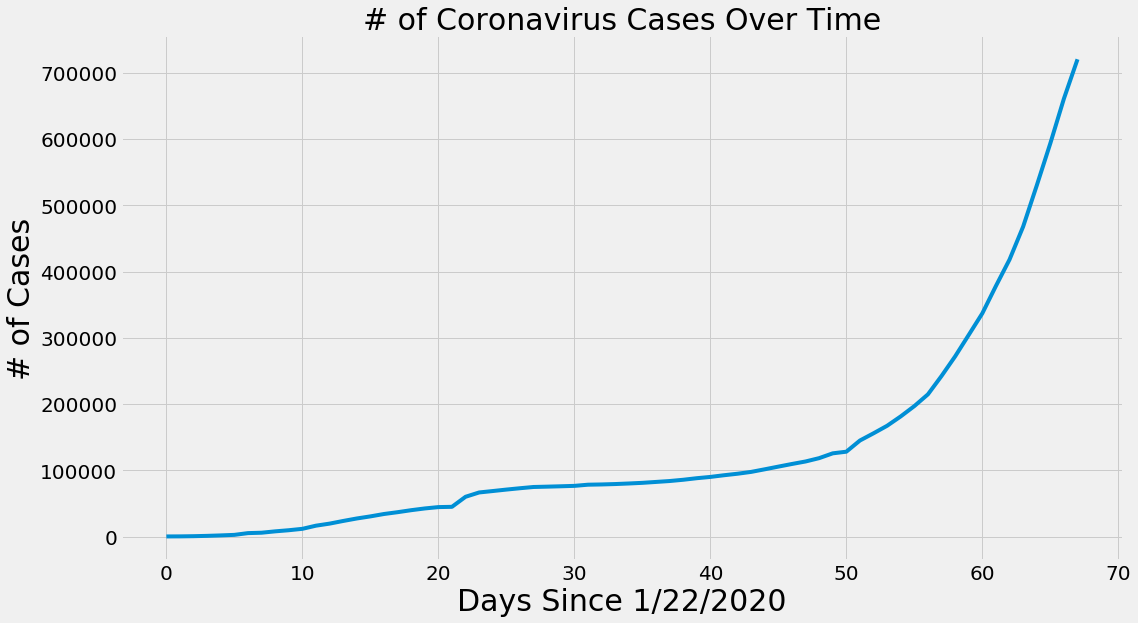

In [266]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

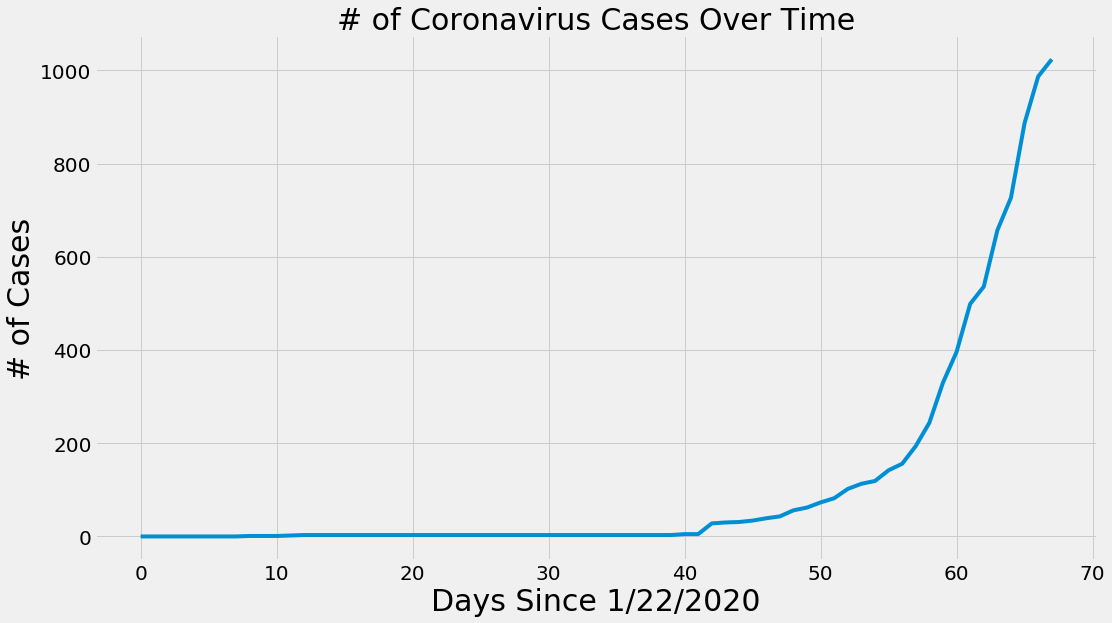

In [267]:
adjusted_dates = adjusted_dates.reshape(1, -1)[0]
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, india_cases)
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

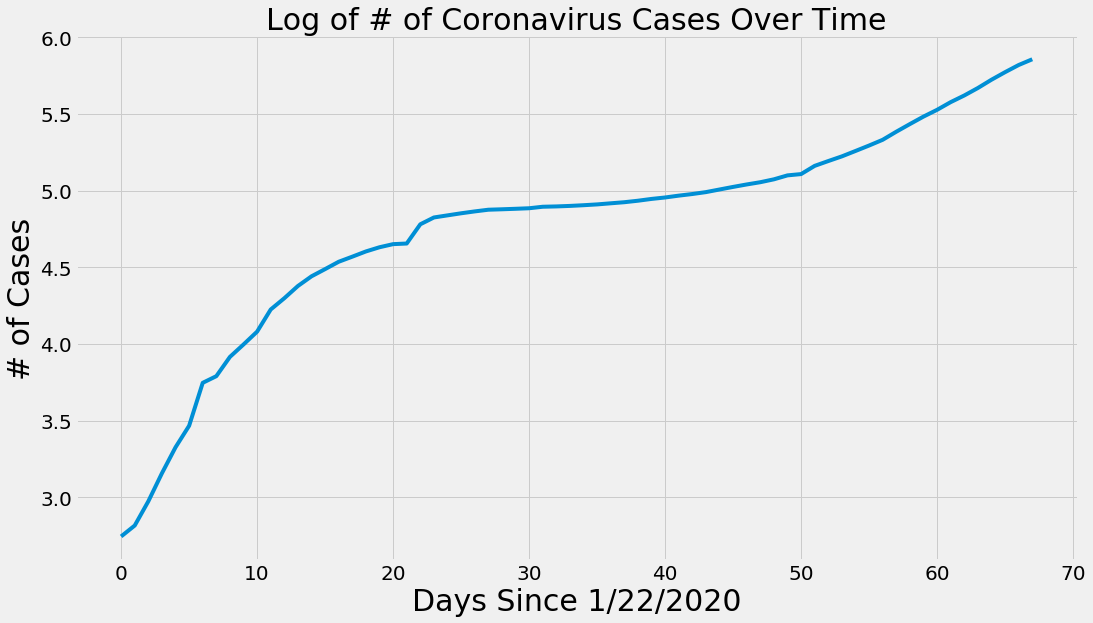

In [268]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, np.log10(world_cases))
plt.title('Log of # of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67]


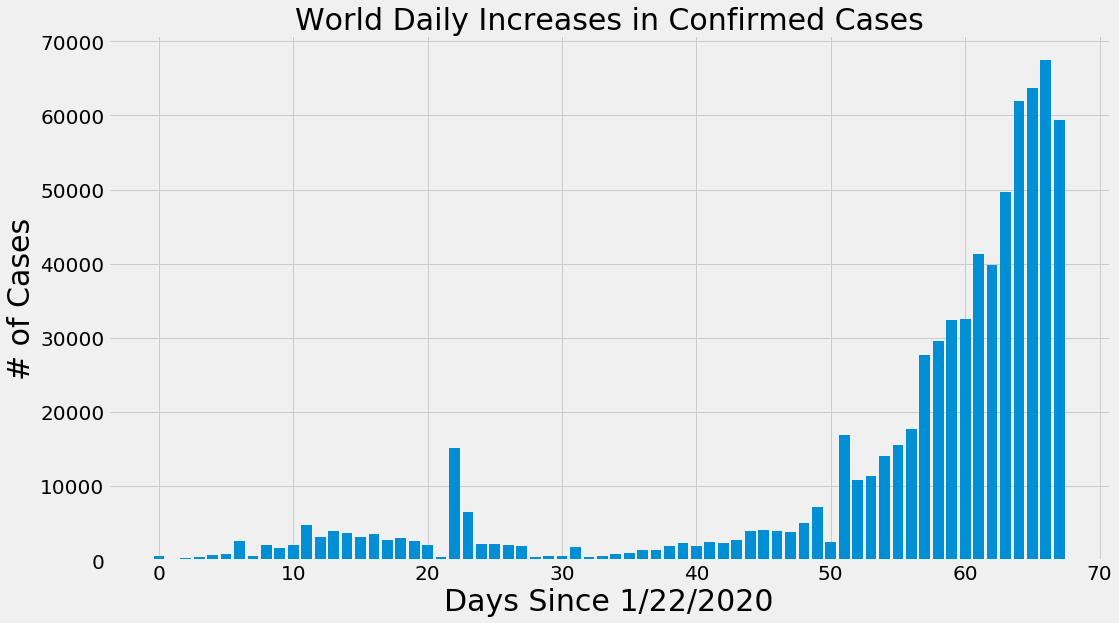

In [269]:
print(adjusted_dates)
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('World Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

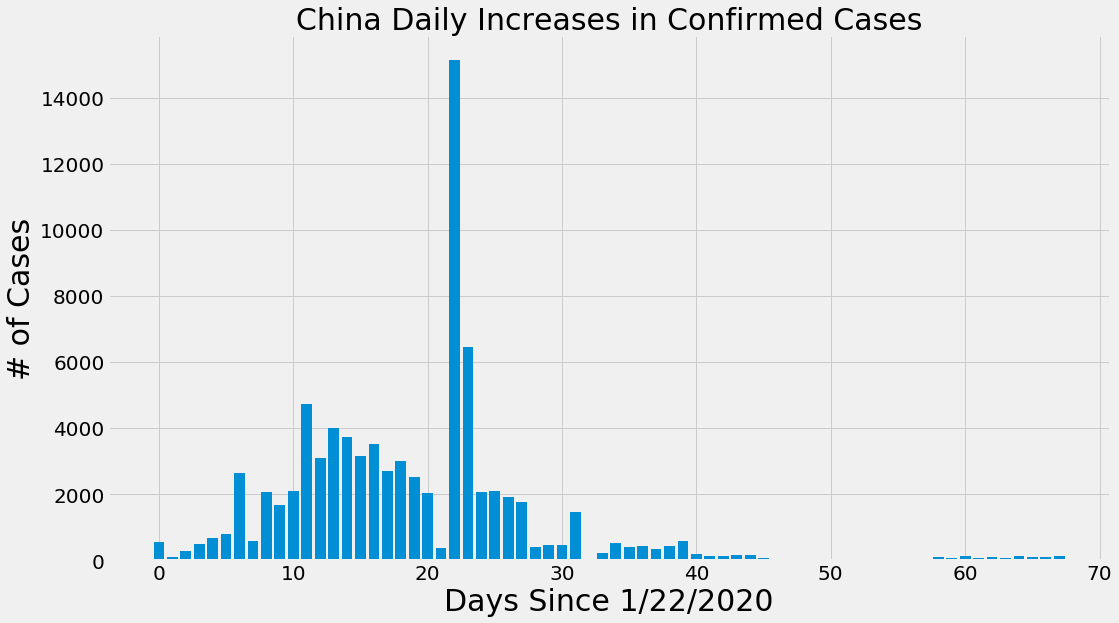

In [270]:

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, china_daily_increase)
plt.title('China Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

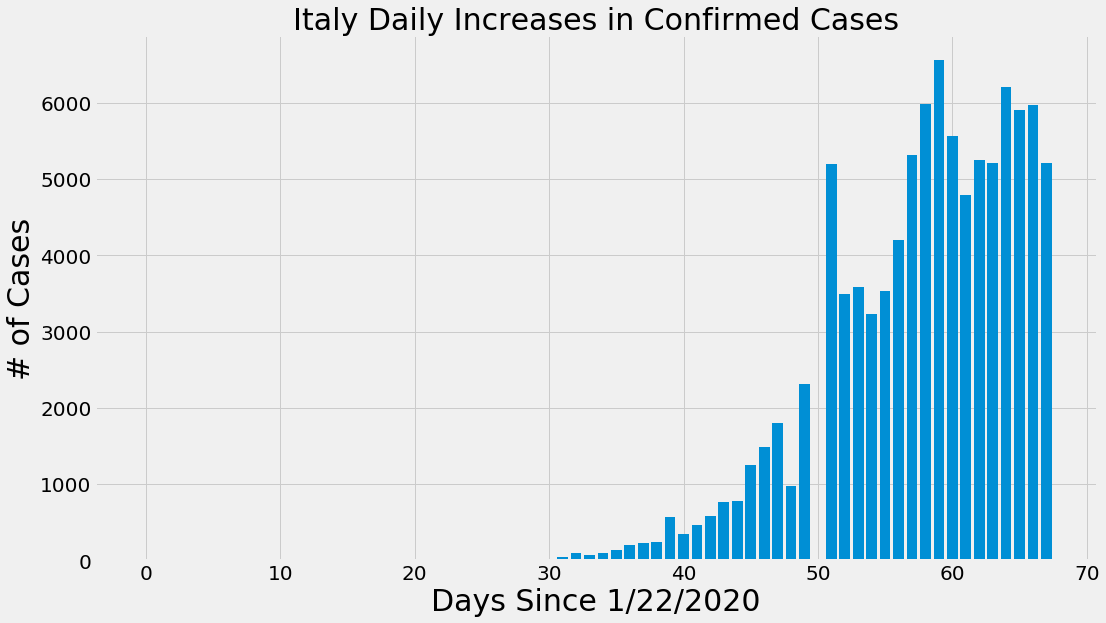

In [271]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, italy_daily_increase)
plt.title('Italy Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

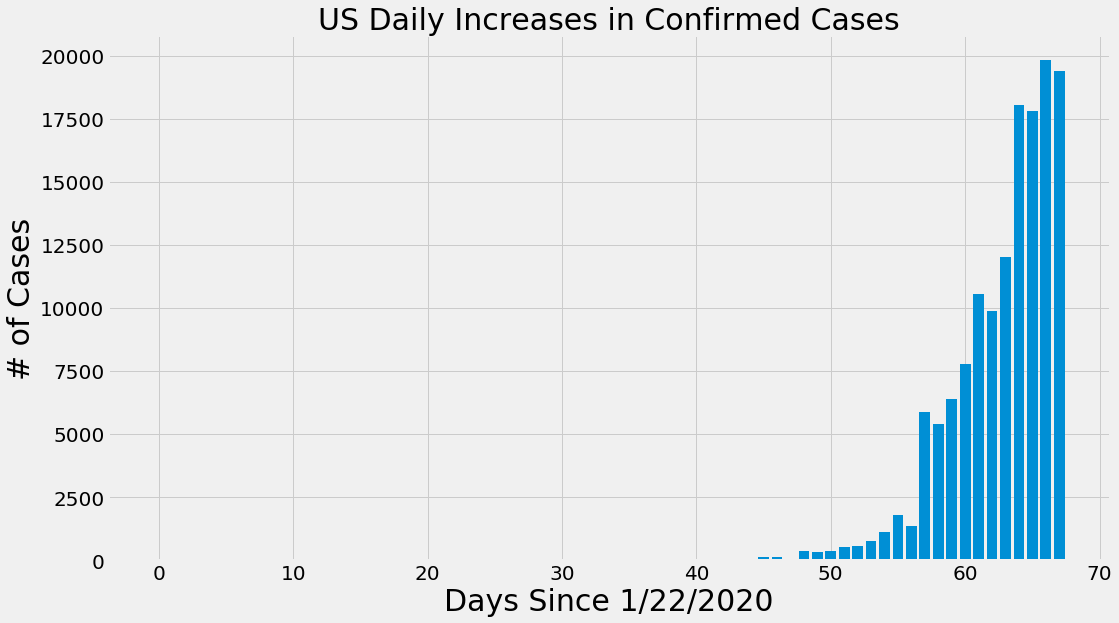

In [272]:

plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, us_daily_increase)
plt.title('US Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

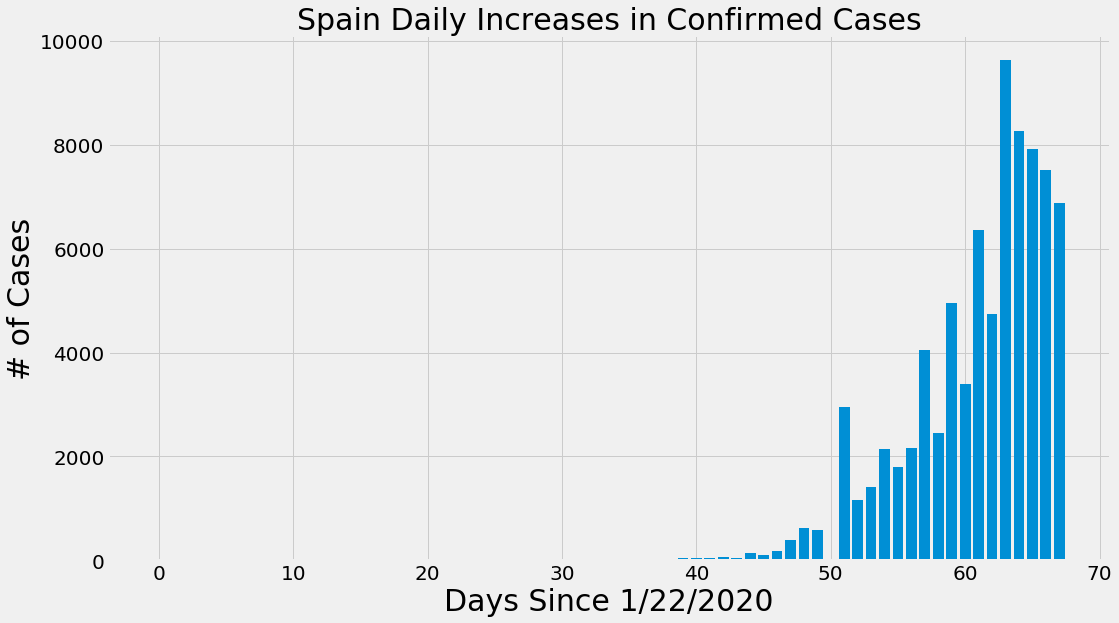

In [273]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, spain_daily_increase)
plt.title('Spain Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

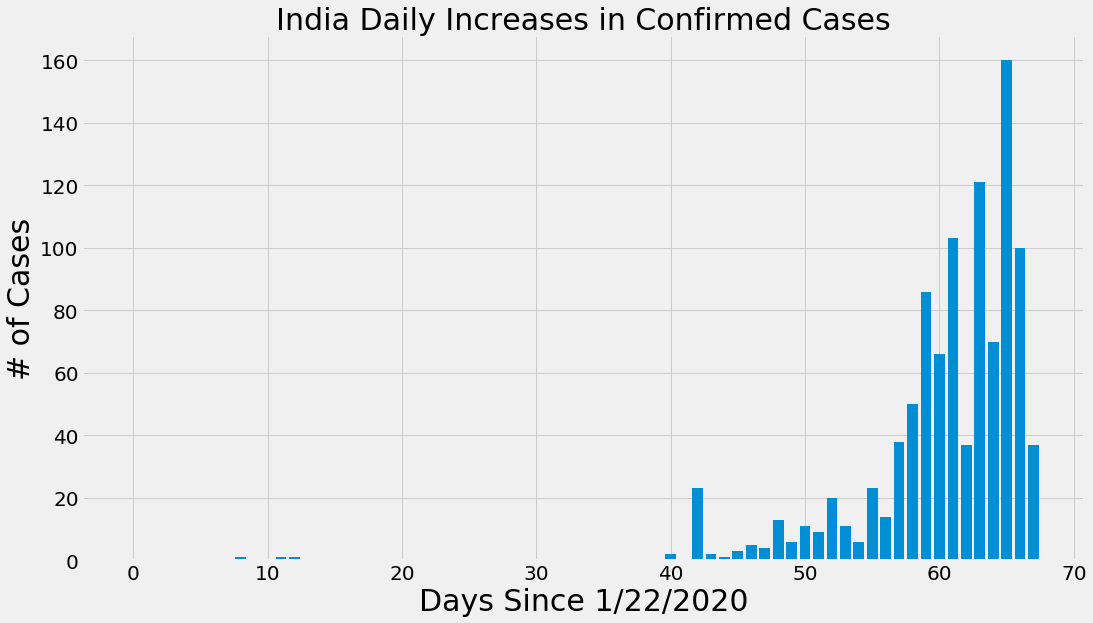

In [274]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, india_daily_increase)
plt.title('India Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

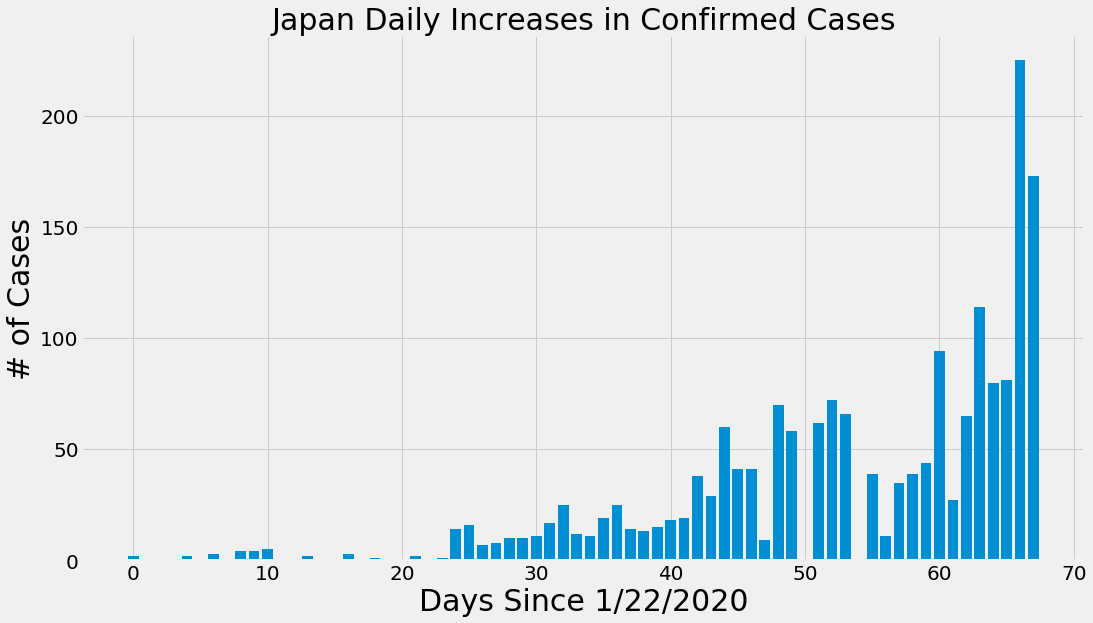

In [275]:
plt.figure(figsize=(16, 9))
plt.bar(adjusted_dates, japan_daily_increase)
plt.title('Japan Daily Increases in Confirmed Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [276]:
#FORECAST

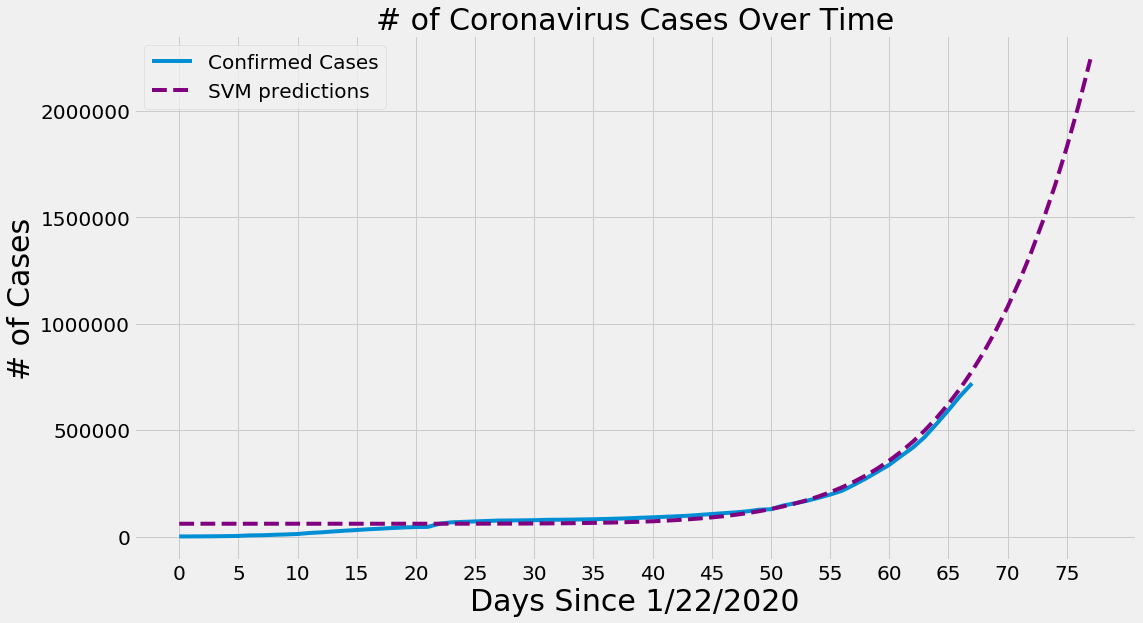

In [277]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, svm_pred, linestyle='dashed', color='purple')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'SVM predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(future_forcast)+1, 5))
plt.show()

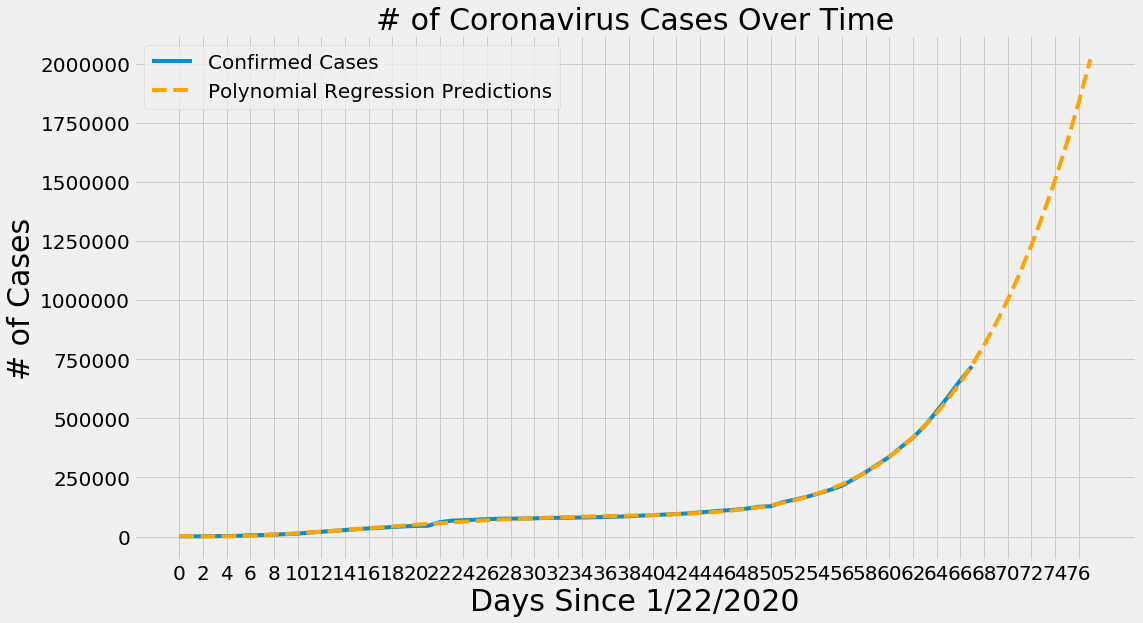

In [278]:
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, world_cases)
plt.plot(future_forcast, linear_pred, linestyle='dashed', color='orange')
plt.title('# of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.legend(['Confirmed Cases', 'Polynomial Regression Predictions'], prop={'size': 20})
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(future_forcast)+1, 2))
plt.show()

In [279]:

# Future predictions using Polynomial Regression 
linear_pred = linear_pred.reshape(1,-1)[0]
print('Polynomial regression future predictions:')
set(zip(future_forcast_dates[-10:], np.round(linear_pred[-10:])))

Polynomial regression future predictions:


{('03/30/2020', 808361.0),
 ('03/31/2020', 899471.0),
 ('04/01/2020', 999702.0),
 ('04/02/2020', 1109743.0),
 ('04/03/2020', 1230319.0),
 ('04/04/2020', 1362195.0),
 ('04/05/2020', 1506172.0),
 ('04/06/2020', 1663095.0),
 ('04/07/2020', 1833851.0),
 ('04/08/2020', 2019370.0)}

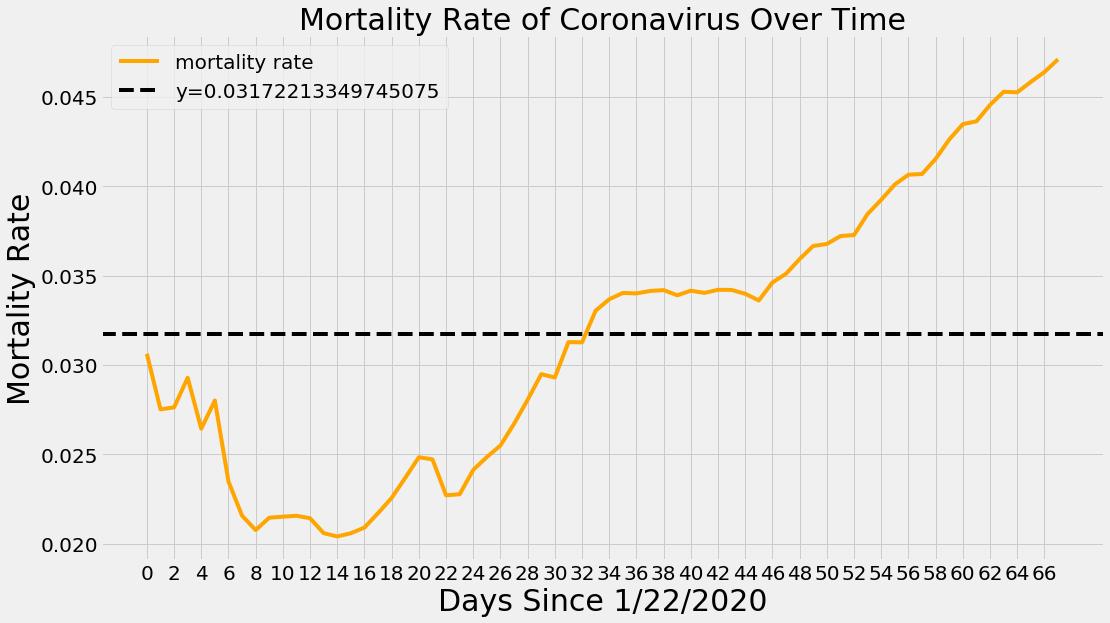

In [280]:

mean_mortality_rate = np.mean(mortality_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, mortality_rate, color='orange')
plt.axhline(y = mean_mortality_rate,linestyle='--', color='black')
plt.title('Mortality Rate of Coronavirus Over Time', size=30)
plt.legend(['mortality rate', 'y='+str(mean_mortality_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Mortality Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(adjusted_dates)+1, 2))
plt.show()

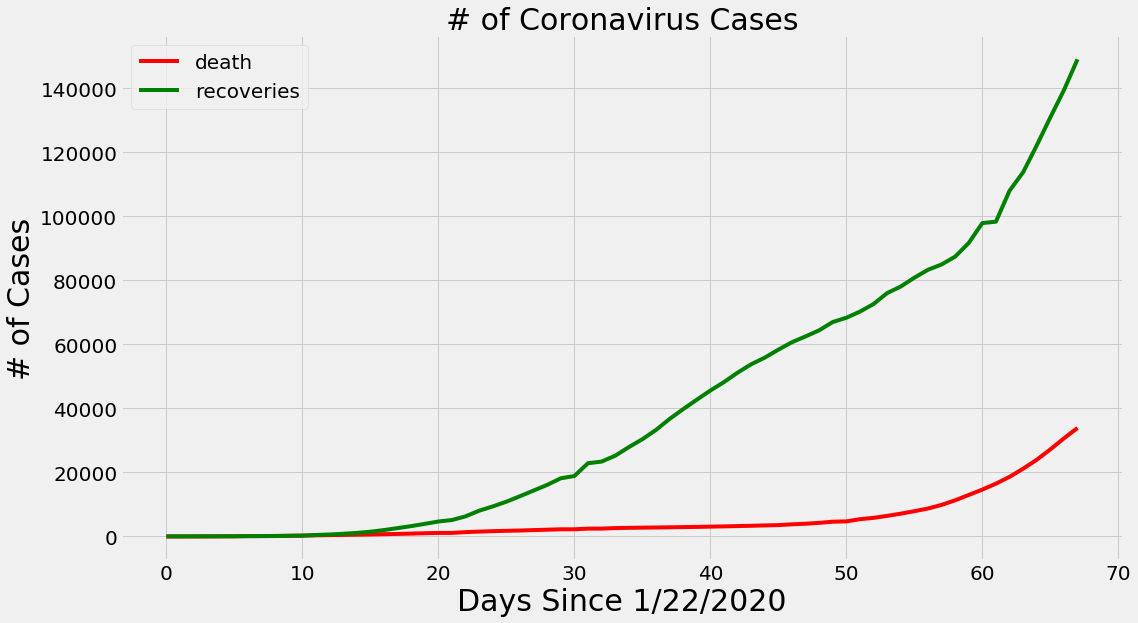

In [281]:

plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, total_deaths, color='r')
plt.plot(adjusted_dates, total_recovered, color='green')
plt.legend(['death', 'recoveries'], loc='best', fontsize=20)
plt.title('# of Coronavirus Cases', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('# of Cases', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

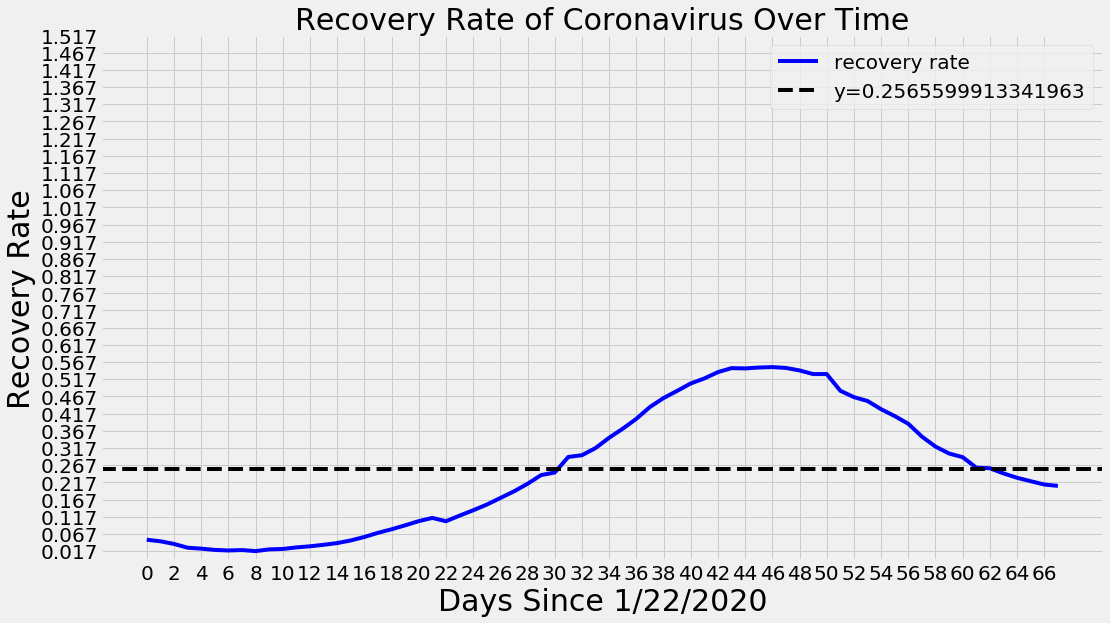

In [282]:

mean_recovery_rate = np.mean(recovery_rate)
plt.figure(figsize=(16, 9))
plt.plot(adjusted_dates, recovery_rate, color='blue')
plt.axhline(y = mean_recovery_rate,linestyle='--', color='black')
plt.title('Recovery Rate of Coronavirus Over Time', size=30)
plt.legend(['recovery rate', 'y='+str(mean_recovery_rate)], prop={'size': 20})
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Recovery Rate', size=30)
plt.xticks(size=20)
plt.yticks(size=20)
plt.xticks(np.arange(0, max(adjusted_dates)+1, 2))
plt.yticks(np.arange(min(recovery_rate), max(recovery_rate)+1, 0.05))
plt.show()

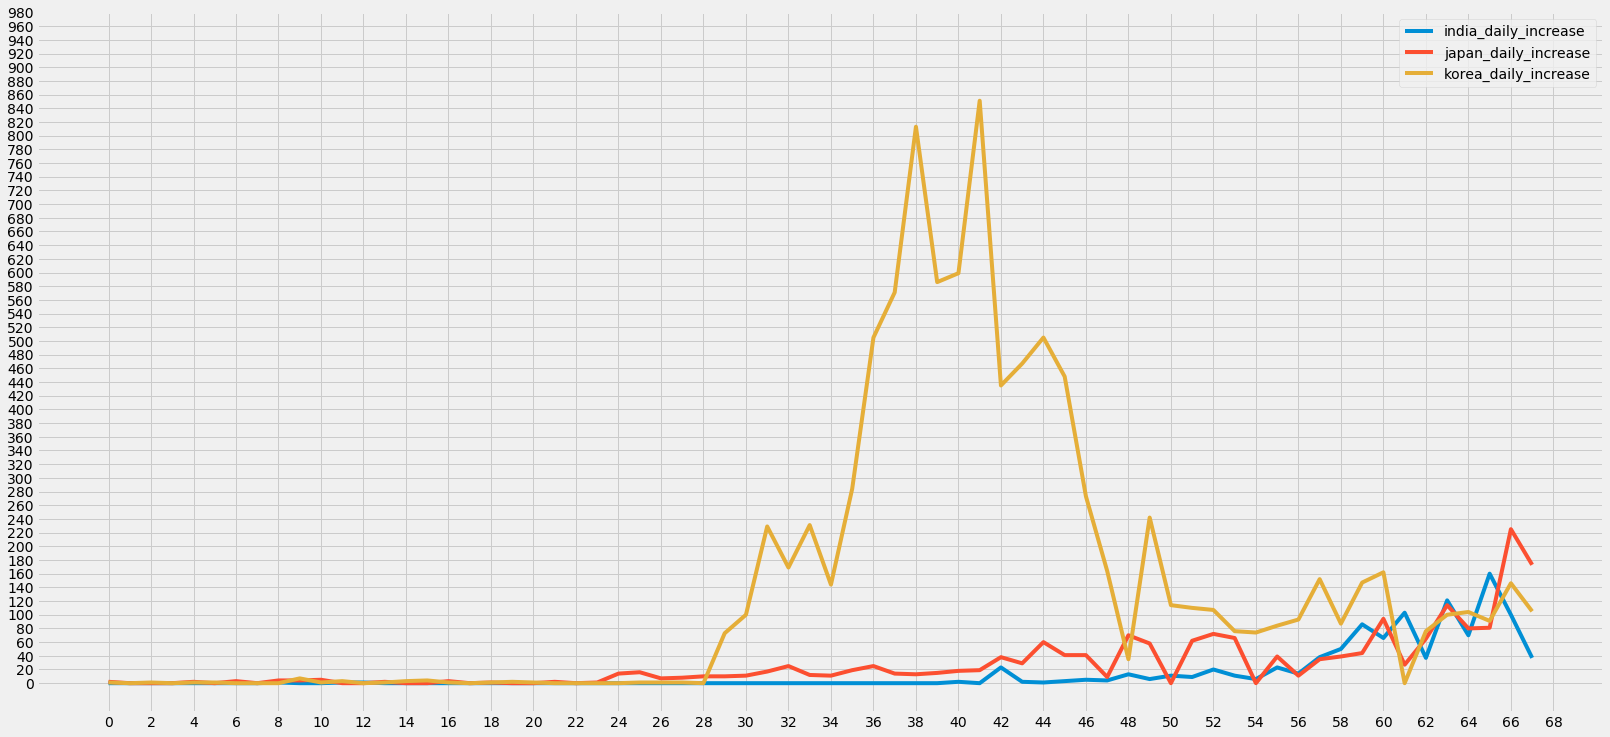

In [283]:
plt.plot(india_daily_increase)
plt.plot(japan_daily_increase)
plt.plot(korea_daily_increase)
plt.legend(['india_daily_increase', 'japan_daily_increase','korea_daily_increase'])
plt.yticks(np.arange(0, 1000, 20))
plt.xticks(np.arange(0, len(world_cases)+1, 2))
plt.show()